#Group 2
# - Radhika Varma 
# - Akhil Bellam
# - Annu Thukral

## Importing Modules

In [1]:
# Download Solvers
%%capture
import sys
import os
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin 
    os.environ['PATH'] += ':bin'

# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

In [2]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=d162a486a6a8404036529fd72a9ec5b8499a374ebdc6000bbfcd58d518417cf6
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=33fbff89dfe9cf69c074738429ca16220c0714dd30fb9a9460474c62ad9e137d
  Stored in directory: /root/.cache/pip/wheels/70/4b/f0/ea

In [3]:
# Import some more modules 
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1 Data Prep and EDA


### 1.1 Data Retrival and Cleaning

> 



In [4]:
# Using Pandas DataFrame to store the dataset
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

# Filter out the rows having sector as 'Materials', 'Consumer Discretionary', and 'Industrials'
sectors = ['Materials', 'Consumer Discretionary', 'Industrials']
df_filtered = df[df['GICS Sector'].isin(sectors)]

# Group by sector and select 3 stocks from each group
df_grouped = df_filtered.groupby('GICS Sector').head(3)

# Print the filtered and grouped DataFrame
print(df_grouped)

   Symbol                    Security             GICS Sector  \
0     MMM                          3M             Industrials   
1     AOS                 A. O. Smith             Industrials   
8     ADP                         ADP             Industrials   
9     AAP          Advance Auto Parts  Consumer Discretionary   
13    APD  Air Products and Chemicals               Materials   
16    ALB       Albemarle Corporation               Materials   
25   AMZN                      Amazon  Consumer Discretionary   
26   AMCR                       Amcor               Materials   
46   APTV                       Aptiv  Consumer Discretionary   

                                 GICS Sub-Industry  \
0                         Industrial Conglomerates   
1                                Building Products   
8             Human Resource & Employment Services   
9                                Automotive Retail   
13                                Industrial Gases   
16                       

In [5]:
df = df[df['GICS Sector'].isin(['Materials', 'Consumer Discretionary', 'Industrials'])]
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
8,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
13,APD,Air Products and Chemicals,Materials,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [6]:
#List of Stocks of Materials sector
materials = df[df['GICS Sector'].isin(['Materials'])][['Symbol',	'Security',	'GICS Sector',	'GICS Sub-Industry']]
materials

,Symbol,Security,GICS Sector,GICS Sub-Industry
13,APD,Air Products and Chemicals,Materials,Industrial Gases
16,ALB,Albemarle Corporation,Materials,Specialty Chemicals
26,AMCR,Amcor,Materials,Paper & Plastic Packaging Products & Materials
56,AVY,Avery Dennison,Materials,Paper & Plastic Packaging Products & Materials
58,BALL,Ball Corporation,Materials,"Metal, Glass & Plastic Containers"
97,CE,Celanese,Materials,Specialty Chemicals
101,CF,CF Industries,Materials,Fertilizers & Agricultural Chemicals
131,CTVA,Corteva,Materials,Fertilizers & Agricultural Chemicals
158,DOW,Dow Inc.,Materials,Commodity Chemicals
161,DD,DuPont,Materials,Specialty Chemicals


In [7]:
#List of stocks of Consumer Discretionary sector
consumer_sector = df[df['GICS Sector'].isin(['Consumer Discretionary'])][['Symbol',	'Security',	'GICS Sector',	'GICS Sub-Industry']]
consumer_sector

,Symbol,Security,GICS Sector,GICS Sub-Industry
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
25,AMZN,Amazon,Consumer Discretionary,Internet & Direct Marketing Retail
46,APTV,Aptiv,Consumer Discretionary,Automotive Parts & Equipment
54,AZO,AutoZone,Consumer Discretionary,Specialty Stores
60,BBWI,"Bath & Body Works, Inc.",Consumer Discretionary,Specialty Stores
65,BBY,Best Buy,Consumer Discretionary,Computer & Electronics Retail
72,BKNG,Booking Holdings,Consumer Discretionary,Internet & Direct Marketing Retail
73,BWA,BorgWarner,Consumer Discretionary,Automotive Parts & Equipment
84,CZR,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming
89,KMX,CarMax,Consumer Discretionary,Automotive Retail


In [8]:
#List of stocks of Industrials sector
industrial = df[df['GICS Sector'].isin(['Industrials'])][['Symbol',	'Security',	'GICS Sector',	'GICS Sub-Industry']]
industrial

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
8,ADP,ADP,Industrials,Human Resource & Employment Services
15,ALK,Alaska Air Group,Industrials,Passenger Airlines
19,ALLE,Allegion,Industrials,Building Products
...,...,...,...,...
470,VRSK,Verisk,Industrials,Research & Consulting Services
478,WAB,Wabtec,Industrials,Construction Machinery & Heavy Transportation ...
482,WM,Waste Management,Industrials,Environmental & Facilities Services
494,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components


In [9]:
#Printing samples form all sectors 
print(materials.sample(3)[['Symbol','Security','GICS Sector']],'\n')

    Symbol        Security GICS Sector
97      CE        Celanese   Materials
489    WRK        WestRock   Materials
429   STLD  Steel Dynamics   Materials 



In [10]:
print(consumer_sector.sample(3)[['Symbol','Security','GICS Sector']],'\n')

    Symbol                        Security             GICS Sector
60    BBWI         Bath & Body Works, Inc.  Consumer Discretionary
183   ETSY                            Etsy  Consumer Discretionary
347   NCLH  Norwegian Cruise Line Holdings  Consumer Discretionary 



In [11]:
print(industrial.sample(3)[['Symbol','Security','GICS Sector']],'\n')

    Symbol Security  GICS Sector
470   VRSK   Verisk  Industrials
362   PCAR   Paccar  Industrials
369    PNR  Pentair  Industrials 



In [12]:
# Assigning the ticketer list 
tickers_list = ['BALL','DD','CF','EBAY','BBY','EXPE','FDX','GE','HON']
# Finally let's pull the historical price data 
# Scope of this project is from 1st Jan 2017 to 31st Dec 2021
dow_prices = {ticker : si.get_data(ticker,start_date = '1/1/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [13]:
# Lets take a preview 
dow_prices

{'BALL':                  open       high        low      close   adjclose   volume  \
 2017-01-03  37.855000  38.075001  37.514999  37.875000  35.727291  1830600   
 2017-01-04  37.904999  38.480000  37.884998  38.450001  36.269688  2219800   
 2017-01-05  38.349998  38.555000  38.145000  38.430000  36.250816  1965800   
 2017-01-06  38.465000  38.674999  38.310001  38.599998  36.411179  1001800   
 2017-01-09  38.535000  38.625000  37.930000  37.990002  35.835766  1329800   
 ...               ...        ...        ...        ...        ...      ...   
 2021-12-23  90.239998  90.580002  89.830002  90.000000  88.600029  1533900   
 2021-12-27  90.330002  91.940002  90.139999  91.919998  90.490150  1244500   
 2021-12-28  92.599998  94.309998  92.180000  94.300003  92.833138  1330000   
 2021-12-29  94.510002  95.620003  94.459999  95.230003  93.748672  1210700   
 2021-12-30  95.599998  96.209999  95.099998  95.449997  93.965240   957300   
 
            ticker  
 2017-01-03   BALL  


### 1.2 Prepare data

In [14]:
# Lets extract only the useful data using adjclose
prep_data = pd.DataFrame(dow_prices[tickers_list[0]]['adjclose']).rename(columns = {"adjclose":tickers_list[0]})

# Here we are merging the ticketers
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,BALL,DD,CF,EBAY,BBY,EXPE,FDX,GE,HON
2017-01-03,35.727291,71.832970,26.791124,27.971760,35.482212,108.642769,172.037277,175.920242,98.109947
2017-01-04,36.269688,72.406631,27.774672,27.896772,36.320316,109.898834,172.963013,175.975784,98.380180
2017-01-05,36.250816,72.082382,27.783075,28.131121,35.382641,110.816765,172.688065,174.976532,98.599747
2017-01-06,36.411179,71.633430,28.136145,29.106007,35.490517,112.517311,174.374527,175.476166,100.094452
2017-01-09,35.835766,72.069908,28.388338,28.824789,35.963493,113.338623,173.861252,174.643509,99.266853
...,...,...,...,...,...,...,...,...,...
2021-12-23,88.600029,76.633484,70.839325,63.331100,92.738281,183.779999,247.261414,72.997856,200.001663
2021-12-27,90.490150,77.872650,72.367798,64.082619,93.683823,182.250000,249.628601,73.479340,201.180878
2021-12-28,92.833138,78.497116,72.818512,64.492516,94.099854,180.800003,249.813721,74.007408,201.785126
2021-12-29,93.748672,78.633713,72.269821,64.863388,95.366875,180.970001,250.836563,73.611351,202.252930


In [15]:
# Lets create return features by using pct_change as the return 
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# Lets drop the null values 
return_data.dropna(inplace=True)
return_data

,BALL,DD,CF,EBAY,BBY,EXPE,FDX,GE,HON
2017-01-04,0.015182,0.007986,0.036712,-0.002681,0.023620,0.011561,0.005381,0.000316,0.002754
2017-01-05,-0.000520,-0.004478,0.000303,0.008401,-0.025817,0.008353,-0.001590,-0.005678,0.002232
2017-01-06,0.004424,-0.006228,0.012708,0.034655,0.003049,0.015346,0.009766,0.002855,0.015159
2017-01-09,-0.015803,0.006093,0.008963,-0.009662,0.013327,0.007299,-0.002944,-0.004745,-0.008268
2017-01-10,-0.004738,-0.002077,-0.030797,-0.016260,0.011998,0.002728,-0.006695,-0.002861,0.002552
...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.000333,0.020000,0.007947,0.014858,0.007292,0.007455,0.015443,0.009992,0.016746
2021-12-27,0.021333,0.016170,0.021577,0.011866,0.010196,-0.008325,0.009574,0.006596,0.005896
2021-12-28,0.025892,0.008019,0.006228,0.006396,0.004441,-0.007956,0.000742,0.007187,0.003004
2021-12-29,0.009862,0.001740,-0.007535,0.005751,0.013465,0.000940,0.004094,-0.005352,0.002318


###1.3 Time series visualizations




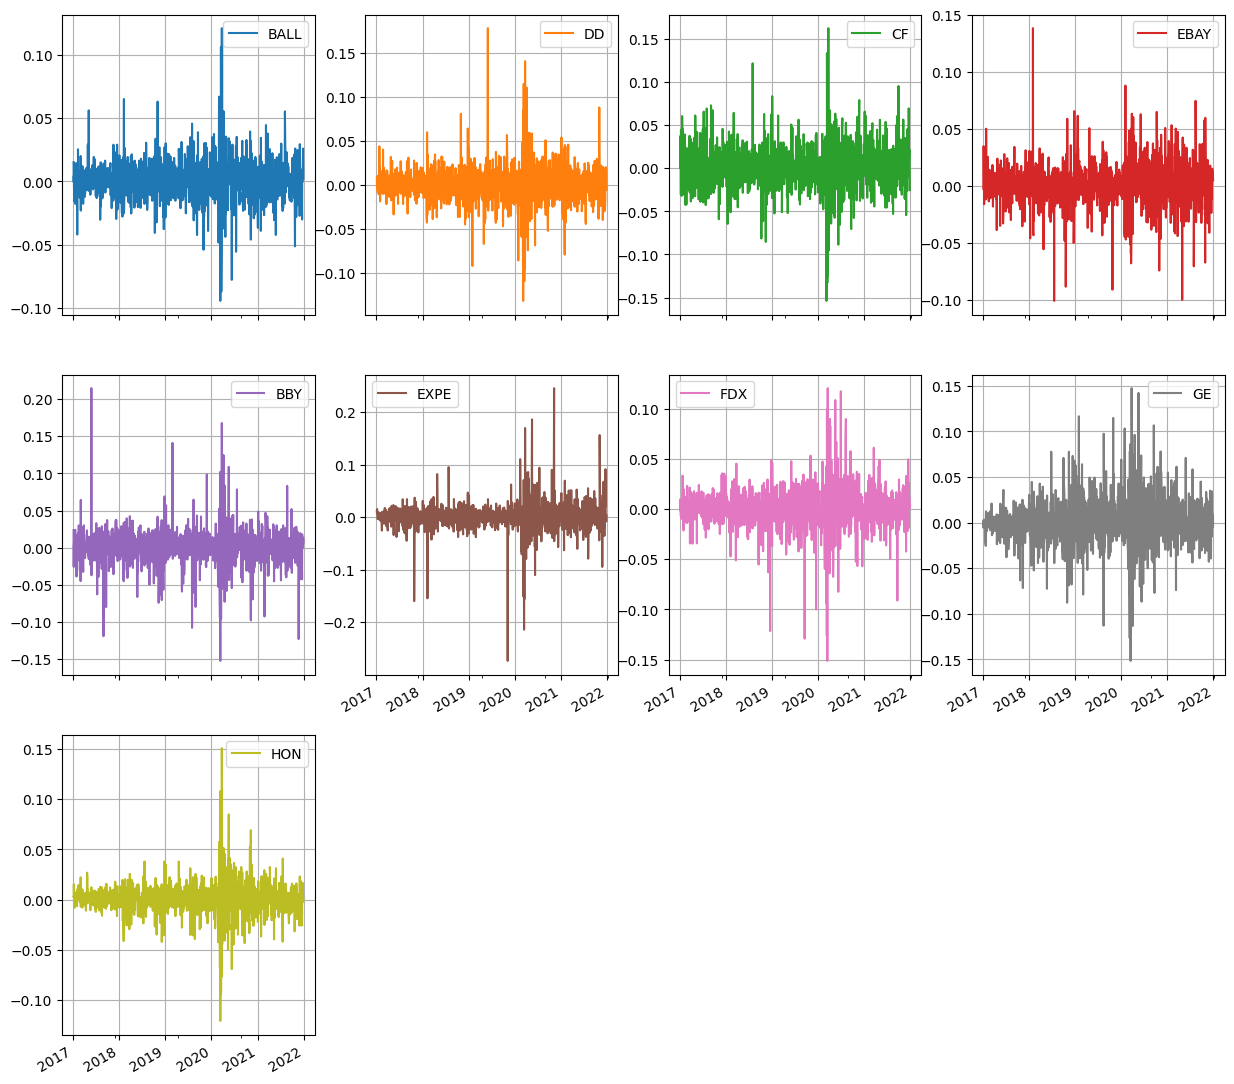

In [16]:
# Lets plot the time series for all stocks 
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

#### 1.3.1 Individual plots for material sector stocks

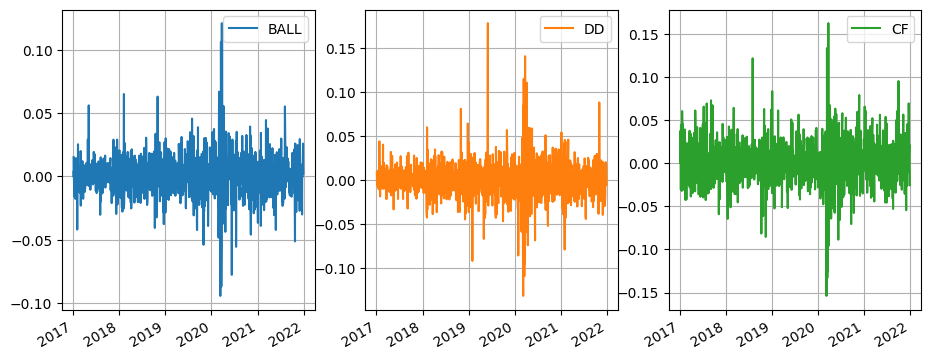

In [17]:
material = return_data.iloc[:,:3]
material


material.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

#### 1.3.2 Individual plots for consumer discretionary sector stocks

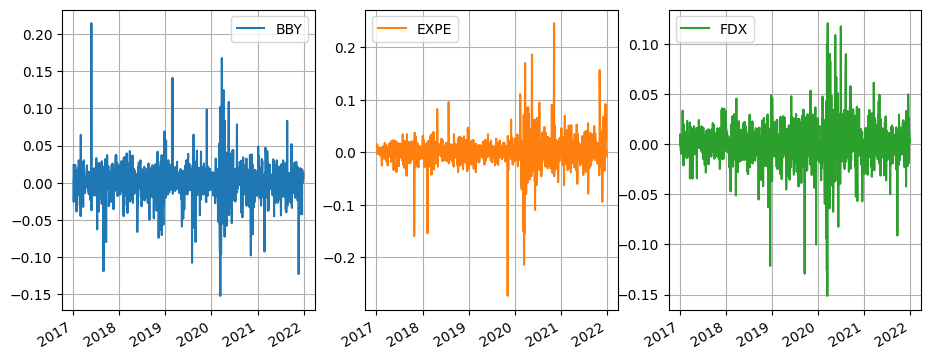

In [18]:
consumer = return_data.iloc[:,4:7]
consumer


consumer.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

#### 1.3.3 Individual plots for industrial sector stocks

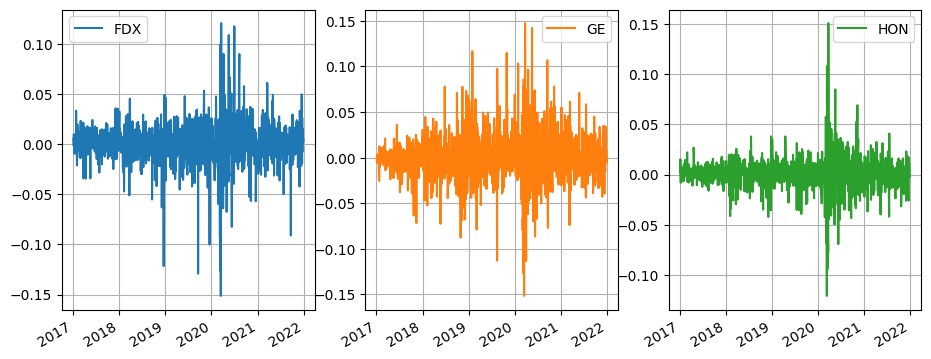

In [19]:
industrial = return_data.iloc[:,6:9]
industrial


industrial.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

## 2 Optimization Model

###2.1 Model 

In [20]:
# creating the covariance table for stock return dataframe
df_cov = return_data.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') 

# creating the average of each stock and looking at the coefficients of the objective function.
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
          BALL        DD        CF      EBAY       BBY      EXPE       FDX  \
BALL  0.000263  0.000125  0.000123  0.000090  0.000120  0.000100  0.000117   
DD    0.000125  0.000453  0.000302  0.000114  0.000229  0.000242  0.000214   
CF    0.000123  0.000302  0.000666  0.000106  0.000223  0.000303  0.000232   
EBAY  0.000090  0.000114  0.000106  0.000350  0.000150  0.000104  0.000118   
BBY   0.000120  0.000229  0.000223  0.000150  0.000583  0.000212  0.000231   
EXPE  0.000100  0.000242  0.000303  0.000104  0.000212  0.000751  0.000208   
FDX   0.000117  0.000214  0.000232  0.000118  0.000231  0.000208  0.000446   
GE    0.000113  0.000263  0.000307  0.000100  0.000212  0.000297  0.000238   
HON   0.000115  0.000226  0.000228  0.000096  0.000185  0.000238  0.000189   

            GE       HON  
BALL  0.000113  0.000115  
DD    0.000263  0.000226  
CF    0.000307  0.000228  
EBAY  0.000100  0.000096  
BBY   0.000212  0.000185  
EXPE  0.000297  0.000238  
FDX   0.000

#### 2.1.1 Concrete Model

In [21]:
#Define concrete model 
from pyomo.environ import *
m = ConcreteModel()

####2.1.2 Defining the variables

In [22]:
#Lets define the variables, every variable represents one stock 
m.x1 = Var(within=NonNegativeReals, bounds=(0,1)) #ball
m.x2 = Var(within=NonNegativeReals, bounds=(0,1)) #dd
m.x3 = Var(within=NonNegativeReals, bounds=(0,1)) #cf
m.x4 = Var(within=NonNegativeReals, bounds=(0,1)) #ebay
m.x5 = Var(within=NonNegativeReals, bounds=(0,1)) #bby
m.x6 = Var(within=NonNegativeReals, bounds=(0,1)) #expe
m.x7 = Var(within=NonNegativeReals, bounds=(0,1)) #fdx
m.x8 = Var(within=NonNegativeReals, bounds=(0,1)) #ge
m.x9 = Var(within=NonNegativeReals, bounds=(0,1)) #hon

# Binary Variables
m.y1 = Var(within=Binary) 
m.y2 = Var(within=Binary) 
m.y3 = Var(within=Binary)
m.y4 = Var(within=Binary) 
m.y5 = Var(within=Binary) 
m.y6 = Var(within=Binary) 
m.y7 = Var(within=Binary) 
m.y8 = Var(within=Binary) 
m.y9 = Var(within=Binary) 

#### 2.1.3 Objective Function

In [23]:
# Defining the objective function
m.objective = Objective(expr = m.x1*m.y1*df_return[0] +
                               m.x2*m.y2*df_return[1] + 
                               m.x3*m.y3*df_return[2] + 
                               m.x4*m.y4*df_return[3] + 
                               m.x5*m.y5*df_return[4] + 
                               m.x6*m.y6*df_return[5] + 
                               m.x7*m.y7*df_return[6] + 
                               m.x8*m.y8*df_return[7] + 
                               m.x9*m.y9*df_return[8],
                        sense = maximize)

In [24]:
#Sum of all proportions is equal to 1
m.sum_proportions = Constraint(expr = m.x1 +
                                      m.x2 + 
                                      m.x3 + 
                                      m.x4 + 
                                      m.x5 + 
                                      m.x6 + 
                                      m.x7 + 
                                      m.x8 + 
                                      m.x9 == 1)

#### 2.1.4 Risk

In [25]:
#Lets just set risk to max 
m.total_risk = Constraint(expr = m.x1 +
                                 m.x2 + 
                                 m.x3 + 
                                 m.x4 + 
                                 m.x5 + 
                                 m.x6 + 
                                 m.x7 + 
                                 m.x8 + 
                                 m.x9 >= 0.0)

In [26]:
# Creating calculations table for calculating the risk
def calc_risk(m):
  variables = m.x1, m.x2, m.x3, m.x4, m.x5, m.x6, m.x7, m.x8, m.x9
  tickers = tickers_list
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

#Compute the risk
expr_risk = calc_risk(m)

max_risk = 0.002

# Sequence of risk levels
risk_limits = np.arange(0, max_risk, 0.00002) # take tiny steps
risk_limits

array([0.00e+00, 2.00e-05, 4.00e-05, 6.00e-05, 8.00e-05, 1.00e-04,
       1.20e-04, 1.40e-04, 1.60e-04, 1.80e-04, 2.00e-04, 2.20e-04,
       2.40e-04, 2.60e-04, 2.80e-04, 3.00e-04, 3.20e-04, 3.40e-04,
       3.60e-04, 3.80e-04, 4.00e-04, 4.20e-04, 4.40e-04, 4.60e-04,
       4.80e-04, 5.00e-04, 5.20e-04, 5.40e-04, 5.60e-04, 5.80e-04,
       6.00e-04, 6.20e-04, 6.40e-04, 6.60e-04, 6.80e-04, 7.00e-04,
       7.20e-04, 7.40e-04, 7.60e-04, 7.80e-04, 8.00e-04, 8.20e-04,
       8.40e-04, 8.60e-04, 8.80e-04, 9.00e-04, 9.20e-04, 9.40e-04,
       9.60e-04, 9.80e-04, 1.00e-03, 1.02e-03, 1.04e-03, 1.06e-03,
       1.08e-03, 1.10e-03, 1.12e-03, 1.14e-03, 1.16e-03, 1.18e-03,
       1.20e-03, 1.22e-03, 1.24e-03, 1.26e-03, 1.28e-03, 1.30e-03,
       1.32e-03, 1.34e-03, 1.36e-03, 1.38e-03, 1.40e-03, 1.42e-03,
       1.44e-03, 1.46e-03, 1.48e-03, 1.50e-03, 1.52e-03, 1.54e-03,
       1.56e-03, 1.58e-03, 1.60e-03, 1.62e-03, 1.64e-03, 1.66e-03,
       1.68e-03, 1.70e-03, 1.72e-03, 1.74e-03, 1.76e-03, 1.78e

#### 2.1.5 Binary constraints

In [27]:
#  selecting no more than 1 stock per sector
m.Constraint1 = Constraint(expr = m.y1 + m.y2 + m.y3 == 1)
m.Constraint2 = Constraint(expr = m.y4 + m.y5 + m.y6 == 1)
m.Constraint3 = Constraint(expr = m.y7 + m.y8 + m.y9 == 1)

# selecting no more than 3 stocks
m.Constraint4 = Constraint(expr = m.y1 + m.y2 + m.y3 + m.y4 + m.y4 + m.y5 +
                           m.y6 + m.y7 + m.y8 + m.y9 <= 3)


####2.1.6 Linking constraints

In [28]:
# These previous demand costraints are replaced as LINKING CONSTRAINTS to make a decision if we should even be in that product line!
m.l1 = Constraint(expr = m.x1 - 1*m.y1 <= 0)
m.l2 = Constraint(expr = m.x2 - 1*m.y2 <= 0)
m.l3 = Constraint(expr = m.x3 - 1*m.y3 <= 0)
m.l4 = Constraint(expr = m.x4 - 1*m.y4 <= 0)
m.l5 = Constraint(expr = m.x5 - 1*m.y5 <= 0)
m.l6 = Constraint(expr = m.x6 - 1*m.y6 <= 0)
m.l7 = Constraint(expr = m.x7 - 1*m.y7 <= 0)
m.l8 = Constraint(expr = m.x8 - 1*m.y8 <= 0)
m.l9 = Constraint(expr = m.x9 - 1*m.y9 <= 0)

####2.1.7 Finally Run the MODEL !

In [29]:
# Updating risk contraint for each limit and then finding a solution to the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # We are excluding and Calculating again the Risk in each iteration
  m.del_component(m.total_risk)
  # The LHS is left unchanged; we modify the Risk threshold (RHS)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  try:
    result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m).write()
    # storing our allocated proportions
    param_analysis[r] = [m.x1(), m.x2(), m.x3(), m.x4(), m.x5(), m.x6(), m.x7(), m.x8(), m.x9()]
    # storing our returns
    # returns[r] = m.objective()
    returns[r] = m.x1()*df_return[0] + m.x2()*df_return[1] + m.x3()*df_return[2] + m.x4()*df_return[3] + m.x5()*df_return[4] + m.x6()*df_return[5] + m.x7()*df_return[6] + m.x8()*df_return[7] + m.x9()*df_return[8]
  except:
    print('Infeasible!')
    continue

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.21116924285888672
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.3441896438598633
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasibl

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.2988896369934082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasibl

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.27847957611083984
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.20964741706848145
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.15013909339904785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.10367918014526367
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.17212224006652832
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.21520185470581055
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.20908784866333008
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

In [30]:
# Lets look at the allocated proportion where the index is indicated as the risk level
param_analysis

{0.0: [None, None, None, None, None, None, None, None, None],
 2e-05: [None, None, None, None, None, None, None, None, None],
 4e-05: [None, None, None, None, None, None, None, None, None],
 6.000000000000001e-05: [None, None, None, None, None, None, None, None, None],
 8e-05: [None, None, None, None, None, None, None, None, None],
 0.0001: [None, None, None, None, None, None, None, None, None],
 0.00012000000000000002: [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 0.00014000000000000001: [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 0.00016: [None, None, None, None, None, None, None, None, None],
 0.00018: [None, None, None, None, None, None, None, None, None],
 0.0002: [0.5668465101813358,
  1.152519999922624e-09,
  1.1396557321196704e-09,
  6.037431033526147e-10,
  0.22309178400076043,
  1.0288328746041618e-09,
  1.052085788537961e-09,
  1.1012652025196482e-09,
  0.21006169973980107],
 0.00022: [0.619138255999829,
  0.0,
  0.0,
 

### 2.2 Parameter Analysis

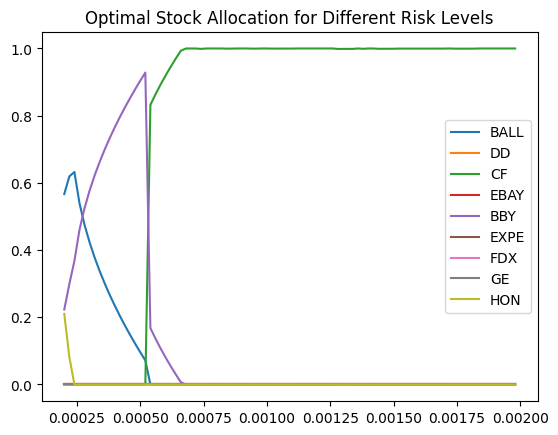

In [31]:
# Generating the dataframe for proportions of the portfolio for the limits of each risk
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = tickers_list
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [32]:
# subset
risk = list(returns.keys())
print(risk)
reward = list(returns.values())
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0002, 0.00022, 0.00024000000000000003, 0.00026000000000000003, 0.00028000000000000003, 0.00030000000000000003, 0.00032, 0.00034, 0.00036, 0.00038, 0.0004, 0.00042, 0.00044, 0.00046, 0.00048000000000000007, 0.0005, 0.0005200000000000001, 0.00054, 0.0005600000000000001, 0.00058, 0.0006000000000000001, 0.00062, 0.00064, 0.0006600000000000001, 0.00068, 0.0007000000000000001, 0.00072, 0.0007400000000000001, 0.00076, 0.0007800000000000001, 0.0008, 0.0008200000000000001, 0.00084, 0.0008600000000000001, 0.00088, 0.0009000000000000001, 0.00092, 0.0009400000000000001, 0.0009600000000000001, 0.0009800000000000002, 0.001, 0.00102, 0.0010400000000000001, 0.0010600000000000002, 0.00108, 0.0011, 0.0011200000000000001, 0.0011400000000000002, 0.00116, 0.00118, 0.0012000000000000001, 0.0012200000000000002, 0.00124, 0.00126, 0.00128, 0.0013000000000000002, 0.0013200000000000002, 0.00134, 0.00136, 0.0013800000000000002, 0.0014000000000000002, 0.00142, 0.00144, 0.0014600000000000001, 0.00148000000000000

### 2.3 Plot with efficient frontier

Here we see optimal portfolios that offer the highest expected return for a given level of risk, or the lowest level of risk for a given expected return.

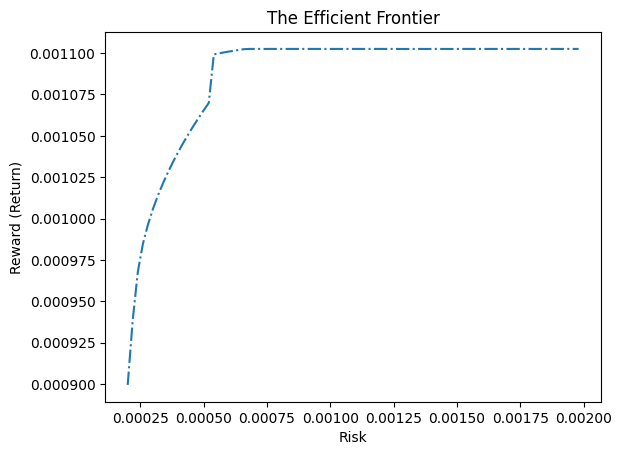

In [33]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

### 2.4 Portfolio selection

In [34]:
# showing the allocation of stocks for each risk level (rounded to 4 decimal places)
round(param_analysis[0.00015:0.00025],4)

,BALL,DD,CF,EBAY,BBY,EXPE,FDX,GE,HON
0.00016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.00020,0.5668,0.0,0.0,0.0,0.2231,0.0,0.0,0.0,0.2101
0.00022,0.6191,0.0,0.0,0.0,0.2989,0.0,0.0,0.0,0.0819
0.00024,0.6324,0.0,0.0,0.0,0.3676,0.0,0.0,0.0,0.0000


In [35]:
# Setting the proportion of funds for each stock
ball_part = 0.5668
bby_part = 0.2231
hon_part = 0.2101

In [36]:
# Lets asssume the funds available for investment are 100000
invest_fund = 100000

In [37]:
# Lets calculate and print the investment for every stock 
ball_invest = ball_part*invest_fund
print("Invest in BALL: $" + str(round(ball_invest, 2)))
bby_invest = bby_part*invest_fund
print("Invest in BBY: $" + str(round(bby_invest, 2)))
hon_invest = hon_part*invest_fund
print("Invest in HON: $" + str(round(hon_invest, 2)))

Invest in BALL: $56680.0
Invest in BBY: $22310.0
Invest in HON: $21010.0


Lets fetch the stock data for 2022

In [38]:
# Assigning the ticker list that we want to scrape
tickers_select = ['BALL', 'BBY', 'HON']
df = {ticker : si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d') for ticker in tickers_select}
# start_date is 12/2/2021 because we require the data for moving average of previous 21 days for 1/1/2022
# end_date is 1/1/2023 because we require data of 12/31/2022

In [39]:
# First trading day of each month
# A few months have the second ot the third day of the month instead of the first for the first trading day
first_day_of_month = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01',
                      '2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01','2022-12-01']

## 3 Analysis 

### 3.1 Buy-and-Hold strategy for the MPT portfolio

In [40]:
# Using pandas dataframe to hold the data for  buy-and-hold strategy
buy_hold1 = pd.DataFrame()

In [41]:
buy_hold1['BALL_prices'] = df['BALL']['close']
buy_hold1['BBY_prices'] = df['BBY']['close']
buy_hold1['HON_prices'] = df['HON']['close']
# Trimming the dataframe from 1/1/2022, we dont want 2021 data here in this case
buy_hold1 = buy_hold1.loc['2022-1-1'::]

In [42]:
# These are the prices of the stocks when we first bought it on the first trading day of 2022 (Jan 3 because Jan 1 and Jan 2 are not trading day)
ball_buy_price = buy_hold1.loc['2022-01-03', 'BALL_prices']
bby_buy_price = buy_hold1.loc['2022-01-03', 'BBY_prices']
hon_buy_price = buy_hold1.loc['2022-01-03', 'HON_prices']

In [43]:
# These are the shares of the stock we were able to buy on the first trading day of 2022 
ball_shares = ball_invest/ball_buy_price
bby_shares = bby_invest/bby_buy_price
hon_shares = hon_invest/hon_buy_price

In [44]:
# The amount of funds invested in each stock on the first day of every month 
buy_hold1['BALL_invest'] = buy_hold1['BALL_prices']*ball_shares
buy_hold1['BBY_invest'] = buy_hold1['BBY_prices']*bby_shares
buy_hold1['HON_invest'] = buy_hold1['HON_prices']*hon_shares

In [45]:
# Collective value of the entire portfolio
buy_hold1['value'] = buy_hold1['BALL_invest'] + buy_hold1['BBY_invest'] + buy_hold1['HON_invest']

In [46]:
# Calculating our return
buy_hold1['return'] = buy_hold1['value'] - invest_fund

In [47]:
# Lets see the table just containg value and return 
buy_hold_1 = buy_hold1.loc[first_day_of_month].copy().reset_index()
buy_hold_1 = buy_hold_1.drop(['BALL_prices', 'BBY_prices', 'HON_prices'], axis = 1)
buy_hold_1.rename(columns={"index": "day"}, inplace = True)
buy_hold_1

,day,BALL_invest,BBY_invest,HON_invest,value,return
0,2022-01-03,56680.000000,22310.000000,21010.000000,100000.000000,0.000000
1,2022-02-01,58691.694803,21945.156401,20861.669533,101498.520737,1498.520737
2,2022-03-01,52778.156548,21230.765261,18652.979068,92661.900878,-7338.099122
3,2022-04-01,54224.636000,19745.179049,19915.813412,93885.628461,-6114.371539
4,2022-05-02,49010.026385,20494.525942,20001.153464,89505.705792,-10494.294208
5,2022-06-01,43315.283264,17494.954884,19497.239446,80307.477594,-19692.522406
6,2022-07-01,43108.645992,14587.138514,17790.430651,75486.215156,-24513.784844
7,2022-08-01,44463.960032,16817.702984,19505.367292,80787.030307,-19212.969693
8,2022-09-01,33803.790127,15696.958704,19377.355663,68878.104494,-31121.895506
9,2022-10-03,30005.269948,13909.886613,17580.126718,61495.283279,-38504.716721


It is evident that we are having a loss of $25079 by the end of year

### 3.2 Momentum trading strategy for each stock in the MPT portfolio

#### 3.2.1 Lets consider **BALL** stock 

In [48]:
ball = df['BALL'].copy() # create dataframe for ball
ball.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis=1, inplace=True) # drop unecessary columns
ball['logClose'] = np.log(ball['close']) 
ball['return'] = ball['logClose'].diff() 

In [49]:
ball['8-day'] = ball['close'].rolling(8).mean().shift() # calculate 8-day average
ball['21-day'] = ball['close'].rolling(21).mean().shift() # calculate 21-day average
ball.dropna(inplace=True) # drop missing vals 

In [50]:
# Adding a column showing whether to invest or not
ball['invested'] = np.where(ball['8-day'] > ball['21-day'], 1, 0)

In [51]:
# Lets see the counts of both 
print(ball['invested'].value_counts()) 

0    170
1     81
Name: invested, dtype: int64


Entering and leaving the market


In [52]:
# The variable signal tells us when to buy and sell
# We use it to make red and green triangles
# 1 = BUY
# 0 = Do nothing
# -1 = SELL
ball['signal'] = ball['invested'].diff()
ball.loc["2022-01-03",'signal'] = 1 

In [53]:
#See how many days we buy, how many days we sell, and how many days we do nothing
print(ball['signal'].value_counts()) 

 0.0    237
 1.0      7
-1.0      7
Name: signal, dtype: int64


Plot trades on time series for 2022

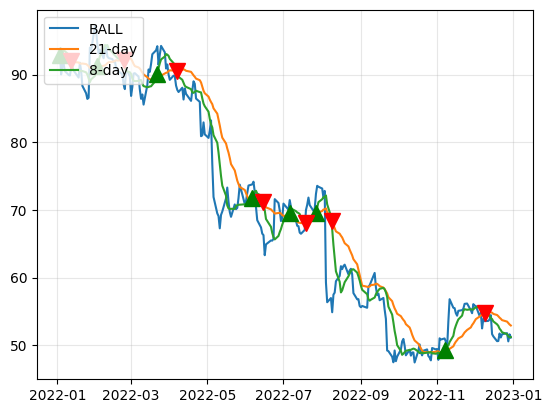

In [54]:
plt.plot(ball['close'], label = 'BALL') # actual value
plt.plot(ball['21-day'], label = '21-day') # 21-day average
plt.plot(ball['8-day'], label = '8-day') # 8-day average
plt.plot(ball.loc[ball.signal == 1].index, ball['8-day'][ball.signal == 1], '^',
         color = 'g', markersize = 12) # buy
plt.plot(ball.loc[ball.signal == -1].index, ball['21-day'][ball.signal == -1], 'v',
         color = 'r', markersize = 12) # sell
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2) # legend
plt.show()


System return - it shows the money we make after trading 

In [55]:
ball['system_return'] = ball['invested'] * ball['return']

In [56]:
# Total system return 
ball['cum_system_return'] = ball['system_return'].cumsum()

In [57]:
ball['money_return'] = (np.exp(ball['cum_system_return'])-1)*ball_invest
ball.loc["2022-01-03",'money_return'] = 0

In [58]:
ball['BALL_invest'] = ball_invest + ball['money_return']

In [59]:
# Lets see the relevant data
ball1 = ball.loc[first_day_of_month].copy().reset_index()
ball1.drop(['close', 'logClose', 'return', '8-day', '21-day', 'invested', 'signal', 'system_return', 'cum_system_return'], axis = 1, inplace = True)
ball1.rename(columns={"index": "day", "money_return": "BALL_return"}, inplace = True)
ball1 = ball1[['day', 'BALL_invest', 'BALL_return']]
ball1

,day,BALL_invest,BALL_return
0,2022-01-03,56680.000000,0.000000
1,2022-02-01,52900.156758,-3779.843242
2,2022-03-01,49323.083545,-7356.916455
3,2022-04-01,47025.063988,-9654.936012
4,2022-05-02,46577.056455,-10102.943545
5,2022-06-01,46577.056455,-10102.943545
6,2022-07-01,42083.890197,-14596.109803
7,2022-08-01,42009.729689,-14670.270311
8,2022-09-01,32718.893639,-23961.106361
9,2022-10-03,32718.893639,-23961.106361


It is evident that by the year end we are at a loss of $20743

#### 3.2.2 Lets Consider the best buy **BBY** stock

In [60]:
bby = df['BBY'].copy() # create dataframe for BBY
bby.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis=1, inplace=True) # dropping the columns that are not used
bby['logClose'] = np.log(bby['close']) 
bby['return'] = bby['logClose'].diff() 

In [61]:
bby['8-day'] = bby['close'].rolling(8).mean().shift() # calculating 8-day average
bby['21-day'] = bby['close'].rolling(21).mean().shift() # calculating 21-day average
bby.dropna(inplace=True) # drop NAs

In [62]:
# Adding a column showing whether to invest or not
bby['invested'] = np.where(bby['8-day'] > bby['21-day'], 1, 0)

In [63]:
# Lets see the count of each
print(bby['invested'].value_counts()) 

0    152
1     99
Name: invested, dtype: int64


ENTERING AND LEAVING THE MARKET

In [64]:
# The variable signal tells us when to buy and sell
# We use it to make red and green triangles
# 1 = BUY
# 0 = Do nothing
# -1 = SELL
bby['signal'] = bby['invested'].diff()
bby.loc["2022-01-03",'signal'] = 1 

In [65]:
# Observing the number of days we buy, the number of days we sell, and how many days we do nothing
print(bby['signal'].value_counts()) 

 0.0    236
 1.0      8
-1.0      7
Name: signal, dtype: int64


Plot trades on time series for 2022

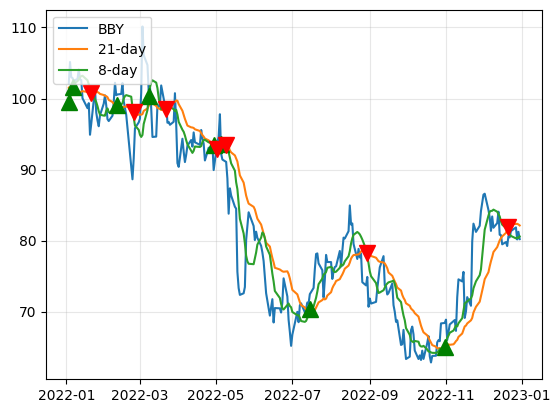

In [66]:
# last year's
plt.plot(bby['close'], label = 'BBY') # actual value
plt.plot(bby['21-day'], label = '21-day') # 21-day average
plt.plot(bby['8-day'], label = '8-day') # 8-day average
plt.plot(bby.loc[bby.signal == 1].index, bby['8-day'][bby.signal == 1], '^',
         color = 'g', markersize = 12) # buy
plt.plot(bby.loc[bby.signal == -1].index, bby['21-day'][bby.signal == -1], 'v',
         color = 'r', markersize = 12) # sell
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2) # legend
plt.show()


System return - it shows the money we make after trading 

In [67]:
bby['system_return'] = bby['invested'] * bby['return']

In [68]:
# Total system return 
bby['cum_system_return'] = bby['system_return'].cumsum()

In [69]:
bby['money_return'] = (np.exp(bby['cum_system_return'])-1)*bby_invest
bby.loc["2022-01-03",'money_return'] = 0

In [70]:
# Calculating how much money we have in BBY
bby['BBY_invest'] = bby_invest + bby['money_return']

In [71]:
# Lets see the relevant data
bby1 = bby.loc[first_day_of_month].copy().reset_index()
bby1.drop(['close', 'logClose', 'return', '8-day', '21-day', 'invested', 'signal', 'system_return', 'cum_system_return'], axis = 1, inplace = True)
bby1.rename(columns={"index": "day", "money_return": "BBY_return"}, inplace = True)
bby1 = bby1[['day', 'BBY_invest', 'BBY_return']]
bby1

,day,BBY_invest,BBY_return
0,2022-01-03,22310.000000,0.000000
1,2022-02-01,20555.524602,-1754.475398
2,2022-03-01,18133.134935,-4176.865065
3,2022-04-01,17151.234039,-5158.765961
4,2022-05-02,16482.265999,-5827.734001
5,2022-06-01,15406.933033,-6903.066967
6,2022-07-01,15406.933033,-6903.066967
7,2022-08-01,16671.714461,-5638.285539
8,2022-09-01,15961.356863,-6348.643137
9,2022-10-03,15961.356863,-6348.643137


It is evident that by the end of the year we are at a loss of $2117

#### 3.2.3 Lets consider the Honeywell **HON** stock

In [72]:
hon = df['HON'].copy() # creating dataframe for HON
hon.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker'], axis=1, inplace=True) # Dropping the columns we dont want
hon['logClose'] = np.log(hon['close']) # Price will always be positive, so this operation is well-defined
hon['return'] = hon['logClose'].diff() # The difference will be positive or negative

In [73]:
hon['8-day'] = hon['close'].rolling(8).mean().shift() # Calculate 8-day average
hon['21-day'] = hon['close'].rolling(21).mean().shift() # Calculate 21-day average
hon.dropna(inplace=True) # remove NAs

In [74]:
# Adding a column showing whether to invest or not
hon['invested'] = np.where(hon['8-day'] > hon['21-day'], 1, 0)

In [75]:
# Lets see the number of days of both 
print(hon['invested'].value_counts()) 

0    134
1    117
Name: invested, dtype: int64


ENTERING AND LEAVING THE MARKET

In [76]:
# The variable signal indicates you when you buy and sell
# We use it to make red and green triangles
# 1 = BUY
# 0 = Do nothing
# -1 = SELL
hon['signal'] = hon['invested'].diff()
hon.loc["2022-01-03",'signal'] = 1 

In [77]:
# Observing the number of days we buy, the number of days we sell, and the number of days we do nothing
print(hon['signal'].value_counts()) 

 0.0    238
 1.0      7
-1.0      6
Name: signal, dtype: int64


Plot trades on time series for 2022

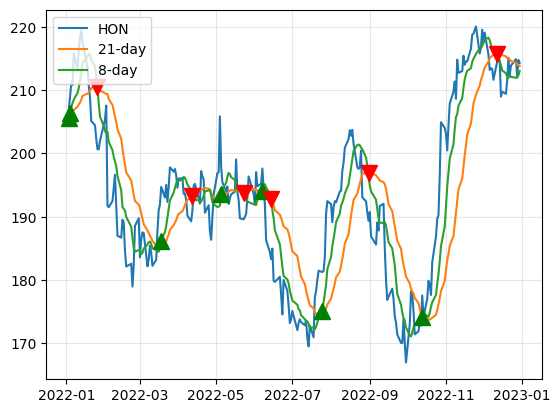

In [78]:
# last year's
plt.plot(hon['close'], label = 'HON') # actual value
plt.plot(hon['21-day'], label = '21-day') # 21-day average
plt.plot(hon['8-day'], label = '8-day') # 8-day average
plt.plot(hon.loc[hon.signal == 1].index, hon['8-day'][hon.signal == 1], '^',
         color = 'g', markersize = 12) # buy
plt.plot(hon.loc[hon.signal == -1].index, hon['21-day'][hon.signal == -1], 'v',
         color = 'r', markersize = 12) # sell
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2) # legend
plt.show()


System return - it shows the money we make after trading 

In [79]:
hon['system_return'] = hon['invested'] * hon['return']

In [80]:
# Total system return
hon['cum_system_return'] = hon['system_return'].cumsum()

In [81]:
hon['money_return'] = (np.exp(hon['cum_system_return'])-1)*hon_invest
hon.loc["2022-01-03",'money_return'] = 0

In [82]:
# Calculating how much money we have in HON
hon['HON_invest'] = hon_invest + hon['money_return']

In [83]:
# DLets see the relevant data 
hon1 = hon.loc[first_day_of_month].copy().reset_index()
hon1.drop(['close', 'logClose', 'return', '8-day', '21-day', 'invested', 'signal', 'system_return', 'cum_system_return'], axis = 1, inplace = True)
hon1.rename(columns={"index": "day", "money_return": "HON_return"}, inplace = True)
hon1 = hon1[['day', 'HON_invest', 'HON_return']]
hon1

,day,HON_invest,HON_return
0,2022-01-03,21010.000000,0.000000
1,2022-02-01,20552.819156,-457.180844
2,2022-03-01,20552.819156,-457.180844
3,2022-04-01,20991.868221,-18.131779
4,2022-05-02,20267.974354,-742.025646
5,2022-06-01,18682.769102,-2327.230898
6,2022-07-01,17651.909424,-3358.090576
7,2022-08-01,18675.208930,-2334.791070
8,2022-09-01,18549.727507,-2460.272493
9,2022-10-03,18549.727507,-2460.272493


It is evident that out of the three stocks, this is the only one where we are having a profit of $2327 !!!! 

### System return for the portfolio

In [84]:
# Creating the new dataframe for the entire portfolio
table1 = pd.DataFrame()
# we have calculated everthing in other dataframes.
# Invested amount
table1['BALL_invest'] = ball['BALL_invest']
table1['BBY_invest'] = bby['BBY_invest']
table1['HON_invest'] = hon['HON_invest']
# return
table1['BALL_return'] = ball['money_return']
table1['BBY_return'] = bby['money_return']
table1['HON_return'] = hon['money_return']

In [85]:
# Total Value 
table1['total_value'] = table1['BALL_invest'] + table1['BBY_invest'] + table1['HON_invest']
# Total return
table1['total_return'] = table1['BALL_return'] + table1['BBY_return'] + table1['HON_return']

In [86]:
# Lets have a look at investment and return data for all stocks on first day of the month 
table_1 = table1.loc[first_day_of_month].copy().reset_index()
table_1.rename(columns={"index": "day"}, inplace = True)
table_1

,day,BALL_invest,BBY_invest,HON_invest,BALL_return,BBY_return,HON_return,total_value,total_return
0,2022-01-03,56680.000000,22310.000000,21010.000000,0.000000,0.000000,0.000000,100000.000000,0.000000
1,2022-02-01,52900.156758,20555.524602,20552.819156,-3779.843242,-1754.475398,-457.180844,94008.500516,-5991.499484
2,2022-03-01,49323.083545,18133.134935,20552.819156,-7356.916455,-4176.865065,-457.180844,88009.037636,-11990.962364
3,2022-04-01,47025.063988,17151.234039,20991.868221,-9654.936012,-5158.765961,-18.131779,85168.166249,-14831.833751
4,2022-05-02,46577.056455,16482.265999,20267.974354,-10102.943545,-5827.734001,-742.025646,83327.296809,-16672.703191
5,2022-06-01,46577.056455,15406.933033,18682.769102,-10102.943545,-6903.066967,-2327.230898,80666.758590,-19333.241410
6,2022-07-01,42083.890197,15406.933033,17651.909424,-14596.109803,-6903.066967,-3358.090576,75142.732654,-24857.267346
7,2022-08-01,42009.729689,16671.714461,18675.208930,-14670.270311,-5638.285539,-2334.791070,77356.653080,-22643.346920
8,2022-09-01,32718.893639,15961.356863,18549.727507,-23961.106361,-6348.643137,-2460.272493,67229.978009,-32770.021991
9,2022-10-03,32718.893639,15961.356863,18549.727507,-23961.106361,-6348.643137,-2460.272493,67229.978009,-32770.021991


We can see that by the end of the year we are at overall loss of $20533 😞

### 8-21 Momentum trading strategy for the entire MPT portfolio

ENTERING THE LEAVING THE MARKET

In [87]:
# Creating new dataframe for the entire portfolio
port = pd.DataFrame()
# ball
port['BALL_return'] = ball['return']
port['BALL_signal'] = ball['signal']
# bby
port['BBY_return'] = bby['return']
port['BBY_signal'] = bby['signal']
# hon
port['HON_return'] = hon['return']
port['HON_signal'] = hon['signal']

In [88]:
# Lets find out when to sell and when to buy 
# "-" means selling
# "0" means doing nothing (there could be 2 stocks cancelling each other out)
# "+" means buying
port['sum_signal'] = port['BALL_signal'] + port['BBY_signal'] + port['HON_signal']

In [89]:
# Resolving the signal into -1, 0, 1
# negative = -1
# zero = 0
# positive = 1
port['signal'] = np.where(port['sum_signal'] > 0, 1, np.where(port['sum_signal'] < 0, -1, 0))

In [90]:
# Calculating to figure out the when money is in and out
# "-" and 0 means out
# "+" means in
port['signal_cumsum'] = port['signal'].cumsum()

CALCULATING INVESTED COLUMN

In [91]:
# Resolving the cumsum signal to make the invested column
# money in = 1
# money out = 0
port['invested'] = np.where(port['signal_cumsum'] > 0, 1, np.where(port['signal_cumsum'] < 0, 0, 0))

SYSTEM RETURN

In [92]:
# The 'system_return' indicates us how much money we will be making using momentum trading
port['BALL_system_return'] = port['invested'] * port['BALL_return']
port['BBY_system_return'] = port['invested'] * port['BBY_return']
port['HON_system_return'] = port['invested'] * port['HON_return']

In [93]:
# Calculating the cumulative system return
port['BALL_cum_system_return'] = port['BALL_system_return'].cumsum()
port['BBY_cum_system_return'] = port['BBY_system_return'].cumsum()
port['HON_cum_system_return'] = port['HON_system_return'].cumsum()

In [94]:
# Money return
port['BALL_money_return'] = (np.exp(port['BALL_cum_system_return'])-1)*ball_invest
port['BBY_money_return'] = (np.exp(port['BBY_cum_system_return'])-1)*bby_invest
port['HON_money_return'] = (np.exp(port['HON_cum_system_return'])-1)*hon_invest

In [95]:
# Setting the return of first day to 0
port.loc["2022-01-03",'BALL_money_return'] = 0
port.loc["2022-01-03",'BBY_money_return'] = 0
port.loc["2022-01-03",'HON_money_return'] = 0

In [96]:
# Calculating how much money we have in each stock
port['BALL_invest'] = ball_invest + port['BALL_money_return']
port['BBY_invest'] = bby_invest + port['BBY_money_return']
port['HON_invest'] = hon_invest + port['HON_money_return']

In [97]:
# Calculating total value of the portfolio
port['total_value'] = port['BALL_invest'] + port['BBY_invest'] + port['HON_invest']
# Calculating total return of the portfolio
port['total_return'] = port['BALL_money_return'] + port['BBY_money_return'] + port['HON_money_return']

### 3.4 Buy-and-Hold strategy for the S&P 500 index

In [98]:
# scraping data for ^GSPC
gspc = si.get_data('^GSPC',start_date = '1/1/2022',end_date='1/1/2023',interval='1d')
# end_date is 1/1/2023 because we require data of 12/31/2022

In [99]:
# create a dataframe to store data for buy-and-hold strategy
buy_hold2 = pd.DataFrame()

In [100]:
# store prices data into dataframe
buy_hold2['^GSPC_prices'] = gspc['close']

In [101]:
# this is the price of the stock when we first buy it on the first trading day of 2022 
gspc_buy_price = buy_hold2.loc['2022-01-03', '^GSPC_prices']

In [102]:
# this is the shares of the stock we were able to buy on the first trading day of 2022 
gspc_shares = invest_fund/gspc_buy_price

In [103]:
# the amount of money invested in each stock on the first day of each month
buy_hold2['^GSPC_invest'] = buy_hold2['^GSPC_prices']*gspc_shares

In [104]:
# aggregate value of the entire portfolio
buy_hold2['value'] = buy_hold2['^GSPC_invest']

In [105]:
# calculate our return
buy_hold2['return'] = buy_hold2['value'] - invest_fund

In [106]:
# show the table without unnecessary columns
buy_hold_2 = buy_hold2.loc[first_day_of_month].copy().reset_index()
buy_hold_2 = buy_hold_2.drop(['^GSPC_prices'], axis = 1)
buy_hold_2

,index,^GSPC_invest,value,return
0,2022-01-03,100000.000000,100000.000000,0.000000
1,2022-02-01,94787.514042,94787.514042,-5212.485958
2,2022-03-01,89778.084982,89778.084982,-10221.915018
3,2022-04-01,94773.333551,94773.333551,-5226.666449
4,2022-05-02,86632.499793,86632.499793,-13367.500207
5,2022-06-01,85503.567773,85503.567773,-14496.432227
6,2022-07-01,79751.530918,79751.530918,-20248.469082
7,2022-08-01,85866.325711,85866.325711,-14133.674289
8,2022-09-01,82701.979110,82701.979110,-17298.020890
9,2022-10-03,76688.916363,76688.916363,-23311.083637


It is evident that by the end of year we are at loss of $15010.54 😢

### 3.5 Plot Comparing the Investment Strategies

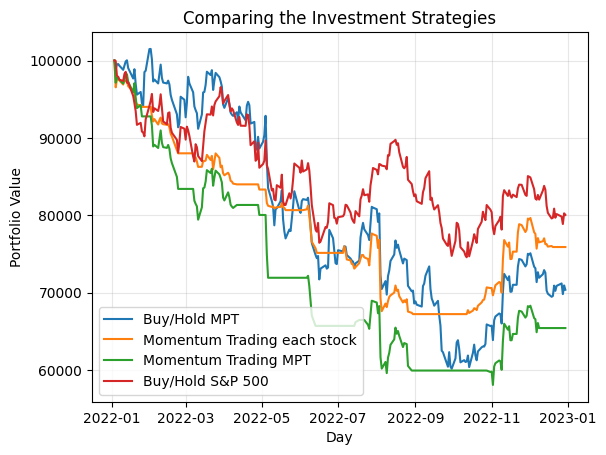

In [107]:
# plot all the strategies
plt.plot(buy_hold1['value'], label='Buy/Hold MPT') # buy and hold BALL, BBY, and HON
plt.plot(table1['total_value'], label='Momentum Trading each stock') # momentum trading of each stocks
plt.plot(port['total_value'], label='Momentum Trading MPT') # momentum trading all stocks
plt.plot(buy_hold2['value'], label='Buy/Hold S&P 500') # buy and hold ^GSPC

plt.legend(loc='lower left') # legend
plt.title('Comparing the Investment Strategies') # title
plt.xlabel('Day') # x axis
plt.ylabel('Portfolio Value') # y axis
plt.grid(True, alpha=.3) # grid
plt.show()

### 3.6 Discussion and Comparison of the Investment Strategies


Best performing strategy was Buy/Hold S&P 500

#4. Conclusion

## 4.1 Thoughts and Insights

What we learnt ?

- Optimization of stock allocation 
- How profitable stocks and trends can be identified
- How investment strategies can be tested
- How we can refine investing strategies by utilising the trends and visulaizations

## 4.2 Individual Contributions

Radhika (rav22001): Coding (Momentum Trading) (Presenter)

Annu (ant22009): Coding (Optimization Model)

Akhil (akb21008): Coding (EDA and layout of data)